# Práctica 2: Derivación e Integración Numérica
## Pablo Olivares Martínez

In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import quad
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tabulate import tabulate
from random import random

**1.- Obtenga mediante interpolación en el espacio $\mathbb{P}_2$ una fórmula para aproximar $f''(a)$ del tipo combinación
de $f(a-h)$, $f(a)$ y $f(a+h)$.**

Para resolver este ejercicio, aplicaremos la idea del polinomio de interpolación de Newton interpolando datos a partir de Lagrange para obtener la segunda derivada en $a$, es decir $f''(a)$, a partir de los nodos $f(a-h)$, $f(a)$ y $f(a+h)$.

In [2]:
def central_2nd_diff(f,a,h):
    z = sp.Symbol('z')
    x = [a-h,a,a+h]
    y = [f(x[0]),f(x[1]),f(x[2])]
    p0 = y[0]
    p1 = p0 + (z-x[0])/(x[1]-x[0])*(y[1]-y[0])
    D = sp.Symbol('D')
    p2 = p1 + (z-x[0])*(z-x[1])*D
    sol2=sp.solve(p2.subs({z:x[2]})-y[2],D)
    D = sol2[0]
    p2 = p1 + (z-x[0])*(z-x[1])*D
    return sp.diff(p2,z,2)

Comprobemos si nuestra función es correcta:

In [3]:
f = sp.Function('f')
a,h = sp.symbols('a,h')
central_2nd_diff(f,a,h)

(-2*f(a) + f(a - h) + f(a + h))/h**2

**2.- Con la fórmula obtenida en el ejercicio 1, halle una tabla de aproximaciones y errores de $f_1''(2.5)$, siendo $f_1(x)=x^x$, para $h=10^{-i},\; i=1,\ldots,5.$**

Primero definimos la función y su derivada segunda:

In [4]:
def f1(x):
    return x**x

def df2_f1(x):
    return sp.diff(f1(x),x,2)

x = sp.Symbol('x')
df2_f1(x)

x**x*((log(x) + 1)**2 + 1/x)

Ahora calculemos las aproximaciones y los errores y dispongámoslos en una tabla:

In [5]:
x0 = 2.5
df2_sol = df2_f1(x).subs({x:x0})
hi = [10**(-i) for i in range(1,6)]
df2_sols = [central_2nd_diff(f1,x0,hi[i]) for i in range(len(hi))]
print('Solución de la derivada segunda de f2: ', df2_sol)
print(tabulate([[hi[i], df2_sols[i], abs(df2_sols[i]-df2_sol)] for i in range(5)], headers=["h", "Aprox", "Error"]))

Solución de la derivada segunda de f2:  40.2416648563875
     h    Aprox        Error
------  -------  -----------
0.1     40.4206  0.178903
0.01    40.2435  0.00178537
0.001   40.2417  1.78497e-05
0.0001  40.2417  7.87646e-07
1e-05   40.2417  5.96287e-06


**3.- Sea $f_2(x)=\frac{x^2+40}{x+\sqrt{5x}+7}$. Calcule una tabla que recoja las derivadas de $f_2$ en $x_i=1,2,\ldots,10$, utilizando alguna de las fórmulas de derivación numérica de primer orden obtenidas al inicio de la práctica, con $h=10^{-3}$, y muestre al mismo tiempo el error cometido en cada punto. Repita el ejercicio con la fórmula centrada obtenida para la derivada primera y, finalmente, para la obtenida en el ejercicio 1 (con respecto a la segunda derivada).**

Vamos a empezar definiendo la función $f_2$ y la fórmula de diferencia progresiva para la derivada:

In [6]:
def progressive_diff(f,a,h):
    z = sp.Symbol('z')
    x = [a,a+h]
    y = [f(x[0]),f(x[1])]
    p = (y[1]-y[0])/(x[1]-x[0])*(z-x[0])+y[0]
    return sp.diff(p,z)

def f2(x):
    return (x**2+40)/(x+sp.sqrt(5*x)+7)

f2(x)

(x**2 + 40)/(sqrt(5)*sqrt(x) + x + 7)

Ahora, calculemos la tabla correspondiente para $f_2$:

In [7]:
h = 10**(-3)
df_f2 = sp.diff(f2(x),x)
aprox_df_f2 = [progressive_diff(f2,i,h) for i in range(1,11)]
sols_df_f2 = [df_f2.subs({x:i+1}) for i in range(10)]

print('Derivada primera de f2: ', df_f2)
print(tabulate([[i+1, sols_df_f2[i], sp.N(aprox_df_f2[i]), sp.N(abs(aprox_df_f2[i]-sols_df_f2[i]))] for i in range(len(sols_df_f2))], headers=["x", "Solución", "Aprox", "Error"]))

Derivada primera de f2:  2*x/(sqrt(5)*sqrt(x) + x + 7) + (-1 - sqrt(5)/(2*sqrt(x)))*(x**2 + 40)/(sqrt(5)*sqrt(x) + x + 7)**2
  x    Solución       Aprox        Error
---  ----------  ----------  -----------
  1  -0.633414   -0.633076   0.000337991
  2  -0.20373    -0.203588   0.00014158
  3   0.0135537   0.0136378  8.41579e-05
  4   0.152356    0.152414   5.74472e-05
  5   0.250865    0.250907   4.23073e-05
  6   0.325234    0.325267   3.27156e-05
  7   0.383753    0.383779   2.61843e-05
  8   0.431202    0.431223   2.15041e-05
  9   0.470567    0.470585   1.802e-05
 10   0.503824    0.503839   1.53477e-05


De la misma forma para la fórmula centrada:

In [8]:
def central_diff(f,a,h):
    z = sp.Symbol('z')
    x = [a-h,a+h]
    y = [f(x[0]),f(x[1])]
    p = (y[1]-y[0])/(x[1]-x[0])*(z-x[0])+y[0]
    return sp.diff(p,z).subs({z:a})

aprox_df_f2 = [central_diff(f2,i,h) for i in range(1,11)]
print('Derivada primera de f2: ', df_f2)
print(tabulate([[i+1, sols_df_f2[i], sp.N(aprox_df_f2[i]), sp.N(abs(aprox_df_f2[i]-sols_df_f2[i]))] for i in range(len(sols_df_f2))], headers=["x", "Solución", "Aprox", "Error"]))

Derivada primera de f2:  2*x/(sqrt(5)*sqrt(x) + x + 7) + (-1 - sqrt(5)/(2*sqrt(x)))*(x**2 + 40)/(sqrt(5)*sqrt(x) + x + 7)**2
  x    Solución       Aprox        Error
---  ----------  ----------  -----------
  1  -0.633414   -0.633414   1.41949e-07
  2  -0.20373    -0.20373    2.98525e-08
  3   0.0135537   0.0135537  1.22134e-08
  4   0.152356    0.152356   6.4666e-09
  5   0.250865    0.250865   3.92631e-09
  6   0.325234    0.325234   2.59763e-09
  7   0.383753    0.383753   1.82138e-09
  8   0.431202    0.431202   1.33417e-09
  9   0.470567    0.470567   1.0098e-09
 10   0.503824    0.503824   7.84804e-10


Y también para la fórmula de la derivada segunda obtenida en el primer ejercicio:

In [9]:
aprox_df2_f2 = [central_2nd_diff(f2,i,h) for i in range(1,11)]
sols_df2_f2 = [sp.diff(f2(x),x,2).subs({x:i+1}) for i in range(10)]
print('Derivada segunda de f2: ', df_f2.diff(x))
print(tabulate([[i+1, sols_df2_f2[i], sp.N(aprox_df2_f2[i]), sp.N(abs(aprox_df2_f2[i]-sols_df2_f2[i]))] for i in range(len(sols_df2_f2))], headers=["x", "Solución", "Aprox", "Error"]))

Derivada segunda de f2:  4*x*(-1 - sqrt(5)/(2*sqrt(x)))/(sqrt(5)*sqrt(x) + x + 7)**2 + (-2 - sqrt(5)/sqrt(x))*(-1 - sqrt(5)/(2*sqrt(x)))*(x**2 + 40)/(sqrt(5)*sqrt(x) + x + 7)**3 + 2/(sqrt(5)*sqrt(x) + x + 7) + sqrt(5)*(x**2 + 40)/(4*x**(3/2)*(sqrt(5)*sqrt(x) + x + 7)**2)
  x    Solución      Aprox        Error
---  ----------  ---------  -----------
  1   0.676265   0.676265   2.88368e-07
  2   0.28322    0.28322    1.93622e-08
  3   0.16834    0.16834    2.48071e-09
  4   0.114907   0.114907   2.99306e-08
  5   0.0846224  0.0846224  1.09258e-10
  6   0.0654364  0.0654364  3.47382e-09
  7   0.0523722  0.0523722  4.36122e-09
  8   0.0430109  0.043011   2.19585e-08
  9   0.036042   0.036042   4.68631e-08
 10   0.030697   0.030697   1.39075e-08


**4.- Divida el intervalo $[1,2]$ en 100 partes iguales y aplique las fórmulas del rectángulo, Simpson y trapecio compuestas para aproximar la integral en dicho intervalo de $f_1$. Compare dichos resultados.**

Para ello, primero defino todas las funciones pertinentes para poder aplicar dichas fórmulas. Esto es, `linea()`, `parabola()` y funciones para pintar las correspondientes gráficas.

In [10]:
xL,yL,xM,yM,xR,yR = sp.symbols('xL,yL,xM,yM,xR,yR')
dyL,dyR = sp.symbols('dyL,dyR')

def linea(z,xL,yL,xR,yR):
    """línea uniendo los puntos (xL,yL) y (xR,yR)"""
    return (z-xL)/(xR-xL)*yR+(xR-z)/(xR-xL)*yL

def parabola(x,xL,yL,xM,yM,xR,yR):
    '''fórmula de la parábola que une los puntos (xL,yL), (xM,yM) y (xR,yR)'''
    return yL -(x-xL)*(x-xM)*(xL*yM-xL*yR-xM*yL+xM*yR+xR*yL-xR*yM)/(xL**2*xM-xL**2*xR-xL*xM**2+xL*xR**2+xM**2*xR-xM*xR**2)+(x-xL)*(yL-yM)/(xL-xM)

def pintaIntegralRectangulo(f,a,b,nx):
    nxx = 100
    xx = np.linspace(float(a),float(b),nxx)
    yy = f(xx)
    x = np.linspace(a,b,nx); y = f(x)
    x0 = (x[1:]+x[:-1])/2; y0 = f(x0)

    fig,ax = plt.subplots(figsize=(8,8))
    ax.plot(x0,y0,'ro')
    ax.plot(xx,yy,'k',label='función del integrando')
    for k in range(1,nx):
        zz = np.linspace(float(x[k-1]),float(x[k]),nxx)
        yk = [linea(z,x[k-1],(y[k-1]+y[k])/2,x[k],(y[k-1]+y[k])/2) for z in zz]
        ax.fill_between(zz,0,yk);

    ax.legend(loc=9)
    ax.set_xlabel('$x$',fontsize=18)
    ax.set_ylabel('$y$',fontsize=18)
    ax.set_title('Fórmula compuesta de los rectángulos del punto medio');

def pintaIntegralTrapecio(f,a,b,nx):
    nxx = 100
    xx = np.linspace(float(a),float(b),nxx)
    yy = f(xx)
    x = np.linspace(a,b,nx); y = f(x)

    fig,ax = plt.subplots(figsize=(8,8))
    ax.plot(x,y,'ro')
    ax.plot(xx,yy,'k',label='función del integrando')
    for k in range(1,nx):
        zz = np.linspace(float(x[k-1]),float(x[k]),nxx)
        yk = [linea(z,x[k-1],y[k-1],x[k],y[k]) for z in zz]
        ax.fill_between(zz,0,yk);

    ax.legend(loc=9)
    ax.set_xlabel('$x$',fontsize=18)
    ax.set_ylabel('$y$',fontsize=18)
    ax.set_title('Fórmula del trapecio compuesta')

def pintaIntegralSimpson(f,a,b,m):
    nx=2*m; nxx = 100;  # fórmula de Simpson compuesta
    xx = np.linspace(float(a),float(b),nxx+1)
    yy = f(xx)
    x = np.linspace(a,b,nx+1); y = f(x)
    fig,ax = plt.subplots(figsize=(8,8))
    ax.plot(x,y,'ro')
    ax.plot(xx,yy,'k',label='función del integrando')

    for k in range(1,m+1):
        zz = np.linspace(float(x[2*(k-1)]),float(x[2*k]),nxx)
        yk = [parabola(z,x[2*(k-1)],y[2*(k-1)],x[2*k-1],y[2*k-1],x[2*k],y[2*k]) for z in zz]
        ax.fill_between(zz,0,yk);

    ax.legend(loc=9)
    ax.set_xlabel('$x$',fontsize=18)
    ax.set_ylabel('$y$',fontsize=18)
    ax.set_title('Fórmula de Simpson compuesta');

Una vez hechos los preparativos previos, vamos a declarar las fórmulas en funciones, comparémoslas con la solución real y pintemos los correspondientes resultados:

In [11]:
a, b = 1, 2
n = 100
m = n//2

def center_rectangle_int(f,a,b,nx):
    '''fórmula compuesta de los rectangulos centrados'''
    h = (b-a)/nx
    return h*sum([f(a+i*h) for i in range(1,nx)])

def trapezoid_int(f,a,b,nx):
    '''fórmula compuesta de los trapecios'''
    h = (b-a)/nx
    return h*(f(a)+f(b))/2+h*sum([f(a+i*h) for i in range(1,nx)])

def simpson_int(f,a,b,m):
    '''fórmula compuesta de Simpson'''
    h= (b-a)/(2*m)
    P = sum([f(a+2*i*h) for i in range(1,m)])
    I = sum([f(a+(2*i-1)*h) for i in range(1,m+1)])
    E = f(a)+f(b)
    return h/3*(E+2*P+4*I)

Integral de f1 calculada con quad:  2.050446234534731
Método Rectangulo compuesto: integral de f1 con n=100: 2.02549433908556
Error de la fórmula compuesta del rectángulo centrado: -0.0249518954491741
Método Trapecio compuesto: integral de f1 con n=100: 2.05049433908556
Error de la fórmula compuesta del trapecio: 4.81045508258227e-5
Método Simpson compuesto: integral de f1 con m=50: 2.05044623595543
Error de la fórmula compuesta de Simpson: 1.42069467301553e-9


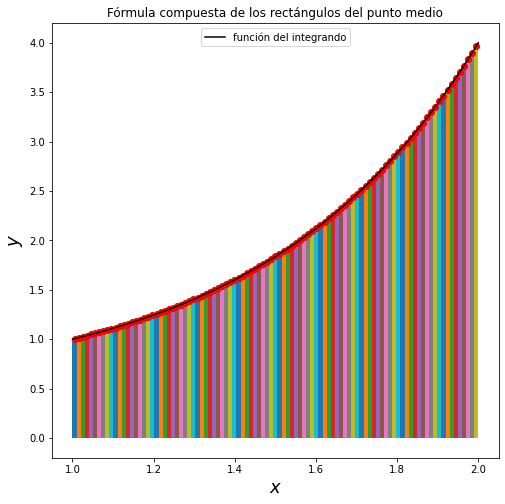

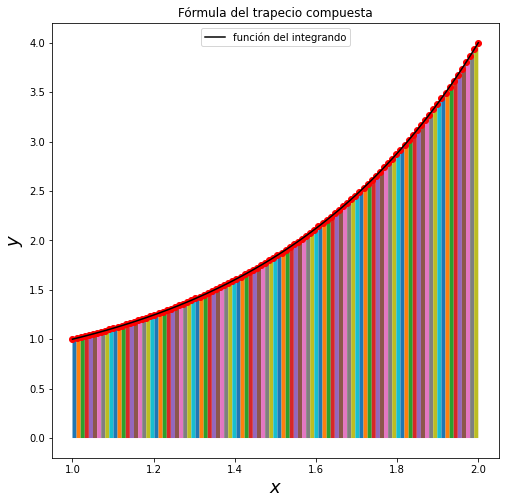

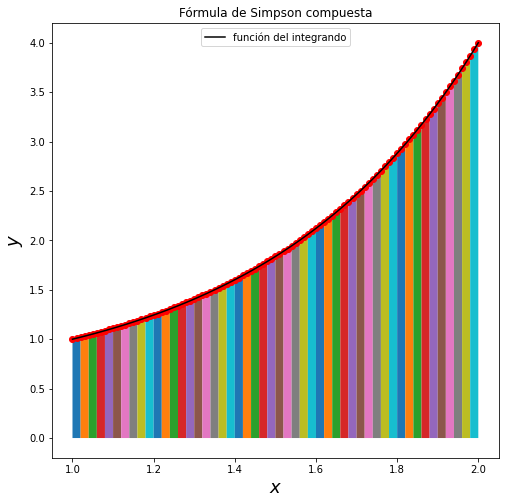

In [12]:
print('Integral de f1 calculada con quad: ',quad(f1,a,b)[0])
print('Método Rectangulo compuesto: integral de f1 con n=100: ' + str(sp.N(center_rectangle_int(f1,a,b,n))))
print('Error de la fórmula compuesta del rectángulo centrado: ' + str(sp.N(center_rectangle_int(f1,a,b,n)-quad(f1,a,b,)[0])))
pintaIntegralRectangulo(f1,a,b,n)
print('Método Trapecio compuesto: integral de f1 con n=100: ' + str(sp.N(trapezoid_int(f1,a,b,n))))
print('Error de la fórmula compuesta del trapecio: ' + str(sp.N(trapezoid_int(f1,a,b,n)-quad(f1,a,b)[0])))
pintaIntegralTrapecio(f1,a,b,n)
print('Método Simpson compuesto: integral de f1 con m=50: ' + str(sp.N(simpson_int(f1,a,b,m))))
print('Error de la fórmula compuesta de Simpson: ' + str(sp.N(simpson_int(f1,a,b,m)-quad(f1,a,b)[0])))
pintaIntegralSimpson(f1,a,b,m)

**5.- Repita el ejercicio 4 para $f_2$.**

Integral de f2 calculada con quad:  3.77658111776791
Método Rectangulo compuesto: integral de f2 con n=100: 3.73846875991387
Error de la fórmula compuesta del rectángulo centrado: -0.0381123578540379
Método Trapecio compuesto: integral de f2 con n=100: 3.77658469845732
Error de la fórmula compuesta del trapecio: 3.58068941030965e-6
Método Simpson compuesto: integral de f2 con m=50: 3.77658111780527
Error de la fórmula compuesta de Simpson: 3.73621134031055e-11


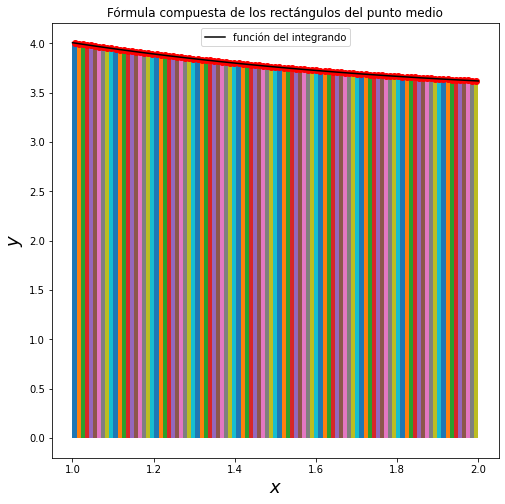

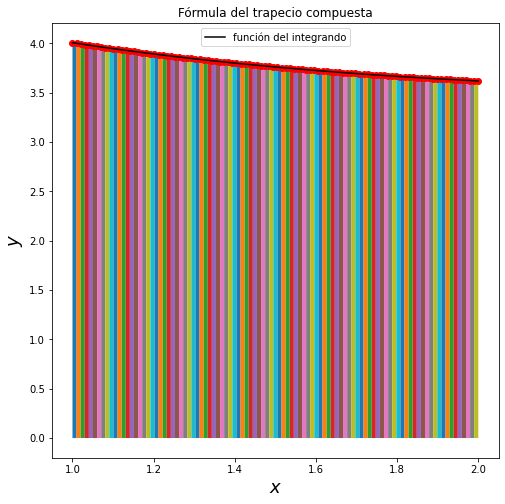

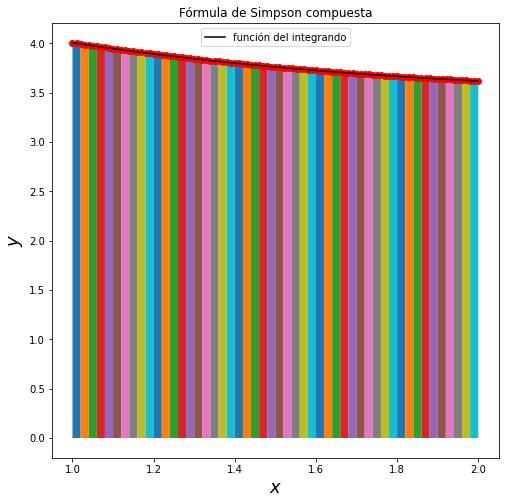

In [13]:
def f2num(x):
    return (x**2+40)/(x+np.sqrt(5*x)+7)

print('Integral de f2 calculada con quad: ',quad(f2num,a,b)[0])
print('Método Rectangulo compuesto: integral de f2 con n=100: ' + str(sp.N(center_rectangle_int(f2num,a,b,n))))
print('Error de la fórmula compuesta del rectángulo centrado: ' + str(sp.N(center_rectangle_int(f2num,a,b,n)-quad(f2num,a,b,)[0])))
pintaIntegralRectangulo(f2num,a,b,n)
print('Método Trapecio compuesto: integral de f2 con n=100: ' + str(sp.N(trapezoid_int(f2num,a,b,n))))
print('Error de la fórmula compuesta del trapecio: ' + str(sp.N(trapezoid_int(f2num,a,b,n)-quad(f2num,a,b)[0])))
pintaIntegralTrapecio(f2num,a,b,n)
print('Método Simpson compuesto: integral de f2 con m=50: ' + str(sp.N(simpson_int(f2num,a,b,m))))
print('Error de la fórmula compuesta de Simpson: ' + str(sp.N(simpson_int(f2num,a,b,m)-quad(f2num,a,b)[0])))
pintaIntegralSimpson(f2num,a,b,m)

**6.- Sea $f_3(x)=x^{15} e^x$ en $[0,2]$. Vamos a dividir el intervalo en $10\times 2^n$ subintervalos, es decir, $10,\,20,\,40,\, 80,\ldots $ y a aplicar la fórmula de Simpson compuesta hasta que la diferencia entre dos aproximaciones consecutivas (por ejemplo, podrían ser con $20$ y $40$ subintervalos) sea menor que $10^{-2}$, dando en tal caso por buena la última aproximación obtenida. Programe y calcule dicha aproximación. Compare ambas aproximaciones con el valor exacto.**

A la hora de hacer este ejercicio, primero definamos $f(x)$ y las variables a utilizar:

In [14]:
def f(x):
    return x**15*sp.exp(x)

a, b = 0, 2
n = 10
e = 10**(-2)
n = 0
nxx = 10*2**(n)

Ahora sigamos con el algoritmo. Éste va a calcular en cada iteración la diferencia entre el actual resultado de calcular la integral con $10 \cdot 2^n$ intervalos y el anterior, con $10 \cdot 2^{n-1}$ intervalos. Si la diferencia es menor que $e$, entonces devuelve la solución.

In [15]:
simpson_anterior = simpson_int(f,a,b,int(nxx/2))
n = n+1
nxx = 10*2**(n)
simpson_actual = simpson_int(f,a,b,int(nxx/2))
print('n = {}. Iteracion n: {}, Iteracion n-1: {}, dif : {}'.format(n,simpson_actual,simpson_anterior,simpson_actual-simpson_anterior))
while abs(sp.N(simpson_actual) - sp.N(simpson_anterior)) >= e:
    simpson_anterior = simpson_actual
    n = n+1 ; nxx = 10*2**(n)
    simpson_actual = simpson_int(f,a,b,int(nxx/2))
    print('n = {}. Iteracion n: {}, Iteracion n-1 : {}, dif: {}'.format(n,simpson_actual,simpson_anterior,simpson_actual-simpson_anterior))

n = 1. Iteracion n: 1092.26666666667*exp(2) + 19058.2112379277, Iteracion n-1: 11821.1255147462 + 2184.53333333333*exp(2), dif : 7237.08572318152 - 1092.26666666667*exp(2)
n = 2. Iteracion n: 546.133333333333*exp(2) + 23031.6200772253, Iteracion n-1 : 1092.26666666667*exp(2) + 19058.2112379277, dif: 3973.40883929756 - 546.133333333333*exp(2)
n = 3. Iteracion n: 273.066666666667*exp(2) + 25045.2709148069, Iteracion n-1 : 546.133333333333*exp(2) + 23031.6200772253, dif: 2013.65083758167 - 273.066666666667*exp(2)
n = 4. Iteracion n: 136.533333333333*exp(2) + 26053.8670897938, Iteracion n-1 : 273.066666666667*exp(2) + 25045.2709148069, dif: 1008.5961749869 - 136.533333333333*exp(2)
n = 5. Iteracion n: 68.2666666666667*exp(2) + 26558.2772558958, Iteracion n-1 : 136.533333333333*exp(2) + 26053.8670897938, dif: 504.410166101938 - 68.2666666666667*exp(2)
n = 6. Iteracion n: 34.1333333333333*exp(2) + 26810.4893660477, Iteracion n-1 : 68.2666666666667*exp(2) + 26558.2772558958, dif: 252.21211015

Ahora veamos los resultados obtenidos:

In [16]:
print('Solución final simbólica: ', simpson_actual)
print('Solución final numérica: ', sp.N(simpson_actual))
print('Diferencia final entre las iteraciones ', n-1, ' y ', n, ': ', abs(sp.N(simpson_actual) - sp.N(simpson_anterior)))
print('Número de intervalos necesarios para obtener la diferencia menor a ', e, ': ', nxx)
print('Solución real evaluada con quad: ', quad(f,a,b)[0], 'Error de nuestra aprox actual frente a la real: ', abs(quad(f,a,b)[0] - sp.N(simpson_actual)))
print('Solución real evaluada con quad: ', quad(f,a,b)[0], 'Error de nuestra aprox anterior frente a la real: ', abs(quad(f,a,b)[0] - sp.N(simpson_anterior)))

Solución final simbólica:  34.1333333333333*exp(2) + 26810.4893660477
Solución final numérica:  27062.7024808912
Diferencia final entre las iteraciones  5  y  6 :  0.00100469155950123
Número de intervalos necesarios para obtener la diferencia menor a  0.01 :  640
Solución real evaluada con quad:  27062.70241389961 Error de nuestra aprox actual frente a la real:  6.69916043989360e-5
Solución real evaluada con quad:  27062.70241389961 Error de nuestra aprox anterior frente a la real:  0.00107168316390016


**7.- Calcule las fórmulas gaussianas con $2$ y $3$ nodos,en el intervalo $[-1,1]$, siendo la función peso el valor absoluto de la variable. Aplíquelas para aproximar la función $x\; e^x$ en $[-1,1]$ y compare los resultados con el valor exacto (organizando los cálculos de forma adecuada).**

Primero definimos las funciones a utilizar. La función peso, $w(x)$, es la que indica el enunciado mientras que la cuadratura gaussiana se ha declarado de la misma forma que en los apuntes.

In [17]:
def w(x):
    return abs(x)

def gaussian_quadrature(f,w,a,b,n):
    '''fórmula de la cuadratura gaussiana para la integral con peso
    no idénticamente 1'''
    z = sp.Symbol('z')
    x = sp.Symbol('x')
    grexact = 2*n-1
    p = sp.symbols('p1:'+ str(n+1))
    c = sp.symbols('c1:'+ str(n+1))
    nodos = list(p)
    coefs = list(c)
    incogs = coefs + nodos

    ecs = [np.dot([(z**i).subs({z:nodos[j]}) for j in range(n)],coefs)-sp.integrate(w(x)*x**i,(x,a,b)) for i in range(grexact+1)]
    solsGauss = sp.solve(ecs,incogs)

    for i in range(n):
        coefs[i] = solsGauss[0][i]
        nodos[i] = solsGauss[0][i+n]

    return np.dot([f(nodos[i]) for i in range(n)],coefs)

Ahora calculemos y veamos los resultados:

In [18]:
a = -1
b = 1
sol = sp.N(sp.integrate(x*sp.exp(x),(x,a,b)))
sol_n2 = sp.N(gaussian_quadrature(lambda x:x*sp.exp(x), w, a, b, 2))
sol_n3 = sp.N(gaussian_quadrature(lambda x:x*sp.exp(x), w, a, b, 3))

print('Valor de la integral de x*e^x en [-1,1]: ' + str(sol))
print('Cuadratura gaussiana para x*e^x con n=2: ' + str(sol_n2))
print('Error respecto a la integral de x*e^x con 2 nodos: ' + str(abs(sol_n2-sol)))
print('Cuadratura gaussiana para x*e^x con n=3: ' + str(sol_n3))
print('Error respecto a la integral de x*e^x con 3 nodos: ' + str(abs(sol_n3-sol)))

Valor de la integral de x*e^x en [-1,1]: 0.735758882342885
Cuadratura gaussiana para x*e^x con n=2: 0.542720820636303
Error respecto a la integral de x*e^x con 2 nodos: 0.193038061706581
Cuadratura gaussiana para x*e^x con n=3: 0.557437075708894
Error respecto a la integral de x*e^x con 3 nodos: 0.178321806633991


**8.- Programar las técnicas de integración de Romberg y adaptativa, para después aplicarlas a la aproximación de la siguiente integral**
$$\int_a^b p(x)\, dx$$
siendo  $\;a=\displaystyle\min_{0\leq i\leq 7}{d_i}$, $\;b=\displaystyle\max_{0\leq i\leq 7}{d_i}$ y 
$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
**(siendo $d_0, d_1, \ldots, d_7$ los dígitos de su DNI, pasaporte o tarjeta de residente).**

De la misma forma que llevamos realizando toda la práctica, primero voy a definir las funciones y acto seguido calcular su valor con los métodos declarados. La implementación realizada se ha hecho siguiendo los apuntes de teoría.

In [19]:
def romberg_int(f,a,b,N):
    '''Método de Romberg para integrar una función f en el intervalo [a,b]'''
    R = np.zeros((N+1,N+1))
    
    for j in range(0,N+1):
        R[j][0] = trapezoid_int(f, a, b, 2**j)
        for k in range(1, j+1):
            R[j][k] = (4**k*R[j][k-1]-R[j-1][k-1])/(4**k-1)
    
    return R[N][N]

def simple_simpson_int(f,a,b):
    '''fórmula simple de Simpson'''
    return (b-a)*(f(a)+4*f((a+b)/2)+f(b))/6

S = simple_simpson_int

def adaptative_int(f,a,b,tol=10**(-16)):
    '''Implementacion del metodo de la integral adaptativa'''
    m = (a+b)/2
    s2 = S(f,a,m) + S(f,m,b)
    
    if abs(S(f,a,b) - s2) < tol:
        return s2
    else:
        return adaptative_int(f,a,m,tol/2)+adaptative_int(f,m,b,tol/2)

Ahora calculemos la integral de $p(x)$ y comparemos su error:

In [20]:
N = 10  # Pongo N=10 de manera arbitraria, pero también podríamos poner
        # un criterio de parada en función del error relativo  
tol = 10**(-6)
DNI = [2,4,4,1,1,2,8]
a,b = min(DNI),max(DNI)
p = lambda x: sum(DNI[i]*x**i for i in range(len(DNI)))

print('Integral real obtenida con quad: ', quad(p,a,b)[0])
print('Integral aproximada por la fórmula de Romberg: ', romberg_int(p,a,b,N))
print('Error del método de Romberg respecto a la integral real: ', abs(quad(p,a,b)[0] - romberg_int(p,a,b,N)))
print('Integral aproximada por la fórmula adaptativa: ', adaptative_int(p,a,b,tol))
print('Error del método adaptativo respecto a la integral real: ', abs(quad(p,a,b)[0] - adaptative_int(p,a,b,tol)))

Integral real obtenida con quad:  2492523.483333333
Integral aproximada por la fórmula de Romberg:  2492523.4833333334
Error del método de Romberg respecto a la integral real:  4.656612873077393e-10
Integral aproximada por la fórmula adaptativa:  2492523.4833333623
Error del método adaptativo respecto a la integral real:  2.9336661100387573e-08
